In [144]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.18.0


In [145]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
from sklearn.model_selection import train_test_split
import pandas as pd
# augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Menetapkan batas waktu pelatihan
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image  # This should now work without errors.
# from google.colab import drive
# drive.mount('/content/drive')

from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization


In [146]:
# dari bapaknya
# base_dir = 'C:/xampp/htdocs/dataset/animal_dataset'
base_dir = '/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/folder_dataset/animal_original_data/animal_dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
folders=os.listdir(train_dir)

#tambahan sendiri
image_paths = []
labels = []
for class_name in folders:
    class_dir = os.path.join(train_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        image_paths.append(img_path)
        labels.append(class_name)

In [147]:
# Split dataset into training (80%) and validation (20%)
# X_train, X_val, y_train, y_val = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(image_paths, labels, test_size=0.2, random_state=42)
# print(len(X_train),len(X_val))
# print(len(y_train),len(y_val))

In [148]:
# train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    )

val_datagen = ImageDataGenerator(rescale=1./255)
# dari bapaknya
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=1
                    )
validation_generator = val_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150, 150),
                    batch_size=1
                    )

# buatan sendiri
# train_generator = train_datagen.flow_from_dataframe(
#     dataframe=pd.DataFrame({'filename': X_train, 'class': y_train}), # direktori data latih
#     x_col='filename',
#     y_col='class',
#     target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
#     batch_size=1,
#     class_mode='categorical', # menggunakan categorical karena klasifikasi lebih dari 2 kelas
# )

# validation_generator = val_datagen.flow_from_dataframe(
#     dataframe=pd.DataFrame({'filename': X_val, 'class': y_val}), # direktori data validasi
#     x_col='filename',
#     y_col='class',
#     target_size=(150,150), # mengubah resolusi gambar menjadi 150x150 piksel
#     batch_size=1,
#     class_mode='categorical',
# )

Found 20 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [149]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Model CNN yang telah diperbaiki
img_input = layers.Input(shape=(150, 150, 3))

# Layer Convolution dan BatchNormalization
x = layers.Conv2D(16, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01))(img_input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

# Flatten and Dense Layers
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)  # Dropout untuk regularisasi

# Output Layer
output = layers.Dense(5, activation='softmax')(x)  # Output layer untuk 5 kelas

model = Model(img_input, output)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

# model CNN buatan sendiri
# model = tf.keras.models.Sequential([
#     Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
#     MaxPooling2D(2,2),
#     Conv2D(64,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(128,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(512,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(5, activation='softmax') # 5 classes output
# ])
# model.compile(optimizer='SGD',
#     loss='mean_squared_error',
#     metrics=['accuracy'])
# model.summary()

# model CNN chatGPT
# Modifikasi model dengan BatchNormalization dan Regularization
# img_input = layers.Input(shape=(150, 150, 3))
# x = layers.Conv2D(16, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01))(img_input)
# x = BatchNormalization()(x)  # Batch Normalization
# x = layers.MaxPooling2D(2)(x)
# x = layers.Conv2D(32, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# x = BatchNormalization()(x)  # Batch Normalization
# x = layers.MaxPooling2D(2)(x)

# x = layers.Conv2D(64, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# x = BatchNormalization()(x)  # Batch Normalization
# x = layers.MaxPooling2D(2)(x)

# x = layers.Flatten()(x)
# x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting

# output = layers.Dense(5, activation='softmax')(x)  # Output layer
# model = Model(img_input, output)

# # Gunakan learning rate yang lebih rendah
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Coba learning rate lebih kecil
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 148, 148, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 72, 72, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 34, 34, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901,989 (3.44 MB)

 Trainable params: 901,509 (3.44 MB)

 Non-trainable params: 480 (1.88 KB)

In [156]:
history = model.fit(
            train_generator,
            # steps_per_epoch=20,
            epochs=250,
            validation_data=validation_generator,
            # validation_steps=10,
            # verbose=2
            )

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8189 - loss: 4.1683 - val_accuracy: 0.6000 - val_loss: 5.5392
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8136 - loss: 4.3384 - val_accuracy: 0.6000 - val_loss: 5.5455
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4713 - loss: 5.0148 - val_accuracy: 0.6000 - val_loss: 5.5430
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5707 - loss: 4.5788 - val_accuracy: 0.6000 - val_loss: 5.5410
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4018 - loss: 5.7751 - val_accuracy: 0.6000 - val_loss: 5.5054
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4788 - loss: 6.3544 - val_accuracy: 0.6000 - val_loss: 5.5080
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3640 - loss: 5.4672 - val_accuracy: 0.6000 - val_loss: 5.5016
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6259 - loss: 4.3388 - val_accuracy: 0.6000 -

In [157]:
# Load history
history = model.history

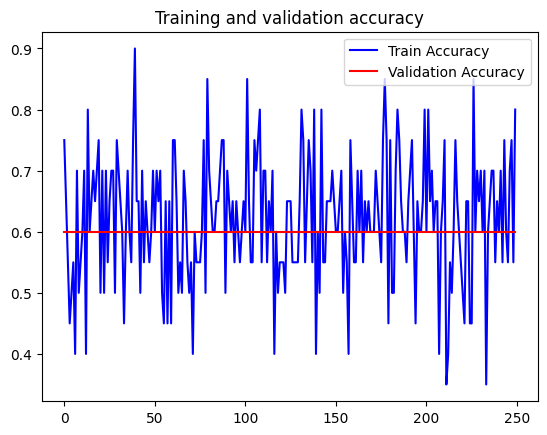

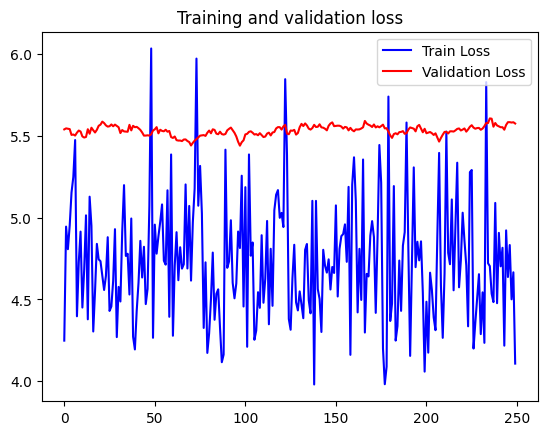

In [158]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =range(len(acc))
plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


# Simpan atau panggil kembali `model`

In [ ]:
# model.save('/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/program_application/UAS_AI_S2_Prof_Ali_Barakbah_Class_Animal/model_e1000_EarlyStopping.h5')

In [ ]:
# panggil model jika sudah pernah dibuat sebelumnya
# jika pertama kali menjalankan, komentar kode ini agar tidak error
# model = tf.keras.models.load_model('/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/program_application/UAS_AI_S2_Prof_Ali_Barakbah_Class_Animal/model_e1000.h5')  # Ganti dengan nama file model Anda


# Tahap ini untuk melakukan Prediksi

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
Nilai Output Units:
 [[0. 1. 0. 0. 0.]]


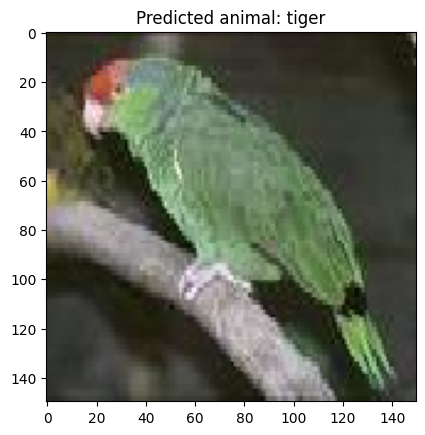

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Nilai Output Units:
 [[1. 0. 0. 0. 0.]]


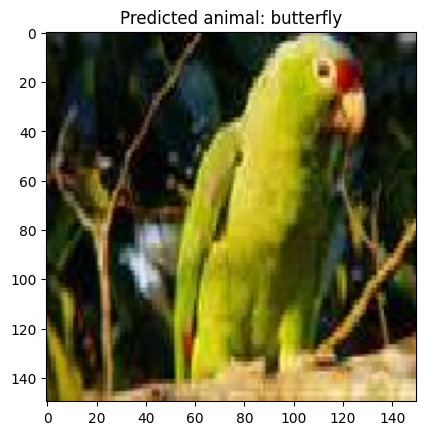

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Nilai Output Units:
 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.5692034e-07 9.9999976e-01]]


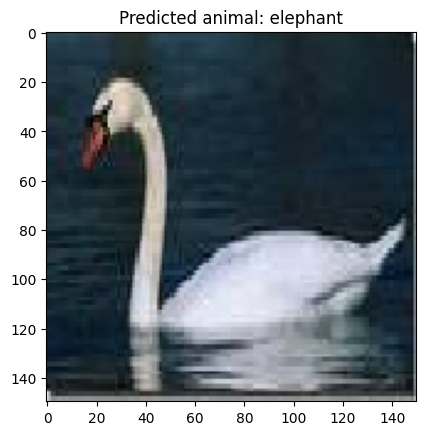

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Nilai Output Units:
 [[0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.2007673e-37]]


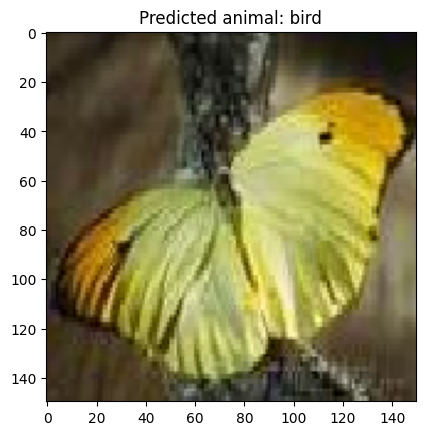

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Nilai Output Units:
 [[0. 0. 1. 0. 0.]]


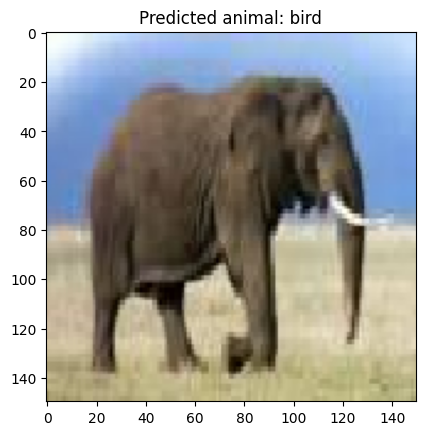

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Nilai Output Units:
 [[1. 0. 0. 0. 0.]]


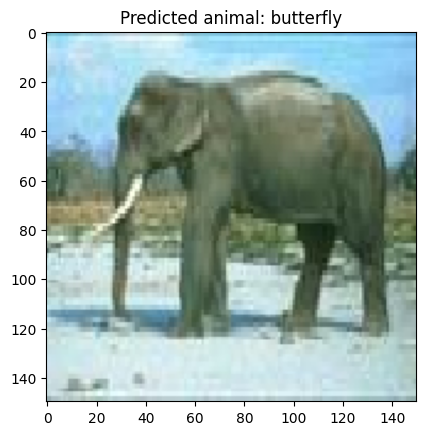

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Nilai Output Units:
 [[0. 0. 0. 0. 1.]]


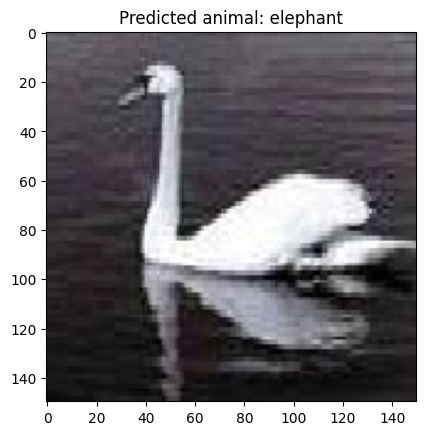

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Nilai Output Units:
 [[0. 0. 0. 0. 1.]]


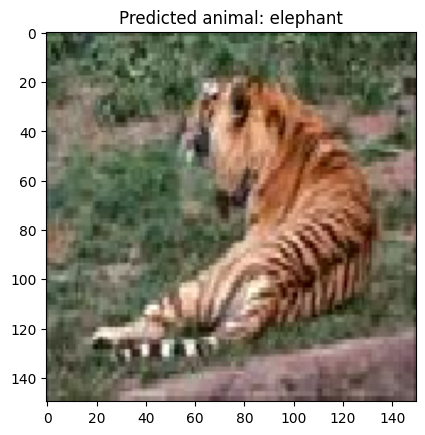

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Nilai Output Units:
 [[0. 0. 0. 0. 1.]]


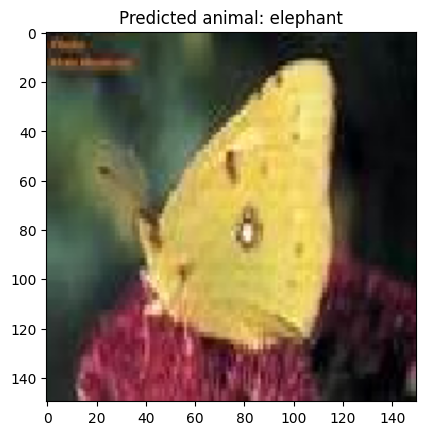

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Nilai Output Units:
 [[0.000000e+00 0.000000e+00 2.642557e-25 0.000000e+00 1.000000e+00]]


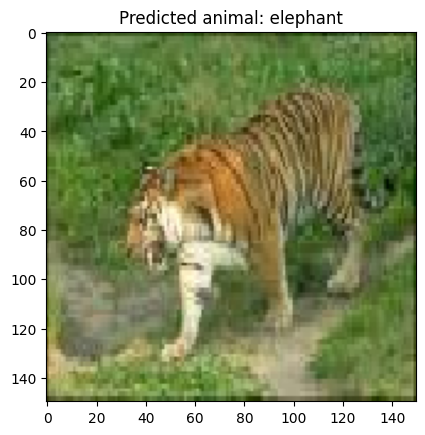

############################################


In [155]:
from keras.preprocessing.image import load_img,img_to_array
# buatan sendiri
for filename in os.listdir(test_dir):
    # Make sure the file is an image (check for .jpg, .jpeg, .png, etc.)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img = load_img(f"{test_dir}//{filename}", color_mode="rgb",target_size=(150, 150))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        preds = model.predict(x)
        print("Nilai Output Units:\n", preds)
        index_preds = np.argmax(preds)
        img_print = image.load_img(f"{test_dir}//{filename}", color_mode="rgb",target_size=(150, 150))
        plt.imshow(img_print)
        plt.title(f'Predicted animal: {folders[index_preds]}')
        plt.show()
        print("############################################")

# Identitas Penulis
- Nama: Widi Arrohman
- Email: widiarrohman1234@gmail.com